##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE225600**

file previously downloaded:
* GSE225600_sc_barcodes.tsv.gz
* GSE225600_sc_features.tsv.gz
* GSE225600_sc_matrix.mtx.gz

Renames as necessary

Dataset should contain 8 samples (4 patients with paired primary tumour and lymph nodes mets from patients with breast cancer)

Will need to check is metadata is in the cell barcodes or not

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE225600')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE225600"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
#load all datasets
BC.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE225600/Data", gene.column=1)  

In [4]:
head(colnames(BC.data))
tail(colnames(BC.data))

[1] "AAACCCAAGACGGTTG-L2" "AAACCCAAGTCACTAC-L2" "AAACCCAGTATTGAGA-L2"
[4] "AAACCCATCAGCTAGT-L2" "AAACCCATCTACCAGA-L2" "AAACCCATCTGCTTAT-L2"

[1] "TTTGTTGTCCAGCCTT-T7" "TTTGTTGTCCATCCGT-T7" "TTTGTTGTCCGTGTAA-T7"
[4] "TTTGTTGTCGTGCACG-T7" "TTTGTTGTCTCTGCCA-T7" "TTTGTTGTCTGGGATT-T7"

In [5]:
#create seurat object
BC <- CreateSeuratObject(counts = BC.data, project = "GSE225600", min.features = 200)
#add metadata to sample
BC@meta.data$cancer_type <- "breast cancer"


In [6]:
# extract the cell barcodes first
bc_meta <- row.names(BC@meta.data)

In [7]:
# split each cell barcode by the separator, which is -. this will return a list, each with 2 entries
bc_meta <- strsplit(bc_meta, "-")

In [9]:
bc_meta[[1]]

[1] "AAACCCAAGACGGTTG" "L2"

In [10]:
# collapse the list to make a 2 column dataframe
bc_meta <- as.data.frame(do.call(rbind, bc_meta))

In [11]:
BC@meta.data$sample_meta <- bc_meta[,2]
head(BC@meta.data)

orig.ident nCount_RNA nFeature_RNA cancer_type  
AAACCCAAGACGGTTG-L2 GSE225600  4634       1632         breast cancer
AAACCCAAGTCACTAC-L2 GSE225600   437        271         breast cancer
AAACCCAGTATTGAGA-L2 GSE225600  2245        826         breast cancer
AAACCCATCAGCTAGT-L2 GSE225600  1510        753         breast cancer
AAACCCATCTACCAGA-L2 GSE225600  5917       1531         breast cancer
AAACCCATCTGCTTAT-L2 GSE225600  4660       1391         breast cancer
                    sample_meta
AAACCCAAGACGGTTG-L2 L2         
AAACCCAAGTCACTAC-L2 L2         
AAACCCAGTATTGAGA-L2 L2         
AAACCCATCAGCTAGT-L2 L2         
AAACCCATCTACCAGA-L2 L2         
AAACCCATCTGCTTAT-L2 L2

In [13]:
#see what samples I have
table(BC$sample_meta)


   L2    L3    L6    L7    T2    T3    T6    T7 
 8684  8921  5578 11433  9720 13907  7593 14195 

In [16]:
#split into seperate seurat objects per sample
BC_L2 <- subset(BC, subset = sample_meta %in% c("L2"))
BC_L3 <- subset(BC, subset = sample_meta %in% c("L3"))
BC_L6 <- subset(BC, subset = sample_meta %in% c("L6"))
BC_L7 <- subset(BC, subset = sample_meta %in% c("L7"))
BC_T2 <- subset(BC, subset = sample_meta %in% c("T2"))
BC_T3 <- subset(BC, subset = sample_meta %in% c("T3"))
BC_T6 <- subset(BC, subset = sample_meta %in% c("T6"))
BC_T7 <- subset(BC, subset = sample_meta %in% c("T7"))

In [18]:
head(colnames(BC_L2))
head(colnames(BC_T6))

[1] "AAACCCAAGACGGTTG-L2" "AAACCCAAGTCACTAC-L2" "AAACCCAGTATTGAGA-L2"
[4] "AAACCCATCAGCTAGT-L2" "AAACCCATCTACCAGA-L2" "AAACCCATCTGCTTAT-L2"

[1] "AAACCCAAGCTCGTGC-T6" "AAACCCAAGTCCCGAC-T6" "AAACCCACAAAGAACT-T6"
[4] "AAACCCACACTCCACT-T6" "AAACCCAGTACGTGAG-T6" "AAACCCAGTAGGTACG-T6"

In [19]:
#Add dataset info to colnames
colnames(BC_L2) <- paste0("GSE225600_LN_mets_pt2_", colnames(BC_L2))
colnames(BC_L3) <- paste0("GSE225600_LN_mets_pt3_", colnames(BC_L3))
colnames(BC_L6) <- paste0("GSE225600_LN_mets_pt6_", colnames(BC_L6))
colnames(BC_L7) <- paste0("GSE225600_LN_mets_pt7_", colnames(BC_L7))
colnames(BC_T2) <- paste0("GSE225600_breast_tumour_pt2_", colnames(BC_T2))
colnames(BC_T3) <- paste0("GSE225600_breast_tumour_pt3_", colnames(BC_T3))
colnames(BC_T6) <- paste0("GSE225600_breast_tumour_pt6_", colnames(BC_T6))
colnames(BC_T7) <- paste0("GSE225600_breast_tumour_pt7_", colnames(BC_T7))

In [20]:
head(colnames(BC_L2))
head(colnames(BC_T6))

[1] "GSE225600_LN_mets_pt2_AAACCCAAGACGGTTG-L2"
[2] "GSE225600_LN_mets_pt2_AAACCCAAGTCACTAC-L2"
[3] "GSE225600_LN_mets_pt2_AAACCCAGTATTGAGA-L2"
[4] "GSE225600_LN_mets_pt2_AAACCCATCAGCTAGT-L2"
[5] "GSE225600_LN_mets_pt2_AAACCCATCTACCAGA-L2"
[6] "GSE225600_LN_mets_pt2_AAACCCATCTGCTTAT-L2"

[1] "GSE225600_breast_tumour_pt6_AAACCCAAGCTCGTGC-T6"
[2] "GSE225600_breast_tumour_pt6_AAACCCAAGTCCCGAC-T6"
[3] "GSE225600_breast_tumour_pt6_AAACCCACAAAGAACT-T6"
[4] "GSE225600_breast_tumour_pt6_AAACCCACACTCCACT-T6"
[5] "GSE225600_breast_tumour_pt6_AAACCCAGTACGTGAG-T6"
[6] "GSE225600_breast_tumour_pt6_AAACCCAGTAGGTACG-T6"

In [21]:
#add metadata to sample
BC_L2@meta.data$sample_type <- "LN mets"
BC_L2@meta.data$patient_id <- "pt2"
BC_L2@meta.data$sample_id <- "GSE225600_BC_LN_mets_pt2"

#add metadata to sample
BC_L3@meta.data$sample_type <- "LN mets"
BC_L3@meta.data$patient_id <- "pt3"
BC_L3@meta.data$sample_id <- "GSE225600_BC_LN_mets_pt3"

#add metadata to sample
BC_L6@meta.data$sample_type <- "LN mets"
BC_L6@meta.data$patient_id <- "pt6"
BC_L6@meta.data$sample_id <- "GSE225600_BC_LN_mets_pt6"

#add metadata to sample
BC_L7@meta.data$sample_type <- "LN mets"
BC_L7@meta.data$patient_id <- "pt7"
BC_L7@meta.data$sample_id <- "GSE225600_BC_LN_mets_pt7"

#add metadata to sample
BC_T2@meta.data$sample_type <- "tumour"
BC_T2@meta.data$patient_id <- "pt2"
BC_T2@meta.data$sample_id <- "GSE225600_breast_tumour_pt2"

#add metadata to sample
BC_T3@meta.data$sample_type <- "tumour"
BC_T3@meta.data$patient_id <- "pt3"
BC_T3@meta.data$sample_id <- "GSE225600_breast_tumour_pt3"

#add metadata to sample
BC_T6@meta.data$sample_type <- "tumour"
BC_T6@meta.data$patient_id <- "pt6"
BC_T6@meta.data$sample_id <- "GSE225600_breast_tumour_pt6"

#add metadata to sample
BC_T7@meta.data$sample_type <- "tumour"
BC_T7@meta.data$patient_id <- "pt7"
BC_T7@meta.data$sample_id <- "GSE225600_breast_tumour_pt7"

In [22]:
head(BC_L7@meta.data) 
head(BC_T6@meta.data) 

orig.ident nCount_RNA nFeature_RNA
GSE225600_LN_mets_pt7_AAACCCAAGAGGTATT-L7 GSE225600  1689        789        
GSE225600_LN_mets_pt7_AAACCCAAGGATTTCC-L7 GSE225600  5567       1778        
GSE225600_LN_mets_pt7_AAACCCACAAAGGTTA-L7 GSE225600  1305        725        
GSE225600_LN_mets_pt7_AAACCCACACCACATA-L7 GSE225600  1861        797        
GSE225600_LN_mets_pt7_AAACCCACAGCACCCA-L7 GSE225600  4139       1740        
GSE225600_LN_mets_pt7_AAACCCACATAACAGA-L7 GSE225600  3364       1453        
                                          cancer_type   sample_meta sample_type
GSE225600_LN_mets_pt7_AAACCCAAGAGGTATT-L7 breast cancer L7          LN mets    
GSE225600_LN_mets_pt7_AAACCCAAGGATTTCC-L7 breast cancer L7          LN mets    
GSE225600_LN_mets_pt7_AAACCCACAAAGGTTA-L7 breast cancer L7          LN mets    
GSE225600_LN_mets_pt7_AAACCCACACCACATA-L7 breast cancer L7          LN mets    
GSE225600_LN_mets_pt7_AAACCCACAGCACCCA-L7 breast cancer L7          LN mets    
GSE225600_LN_mets_pt7_AAACCCACATAACAGA-L7 breast cancer L7          LN mets    
                                          patient_id sample_id               
GSE225600_LN_mets_pt7_AAACCCAAGAGGTATT-L7 pt7        GSE225600_BC_LN_mets_pt7
GSE225600_LN_mets_pt7_AAACCCAAGGATTTCC-L7 pt7        GSE225600_BC_LN_mets_pt7
GSE225600_LN_mets_pt7_AAACCCACAAAGGTTA-L7 pt7        GSE225600_BC_LN_mets_pt7
GSE225600_LN_mets_pt7_AAACCCACACCACATA-L7 pt7        GSE225600_BC_LN_mets_pt7
GSE225600_LN_mets_pt7_AAACCCACAGCACCCA-L7 pt7        GSE225600_BC_LN_mets_pt7
GSE225600_LN_mets_pt7_AAACCCACATAACAGA-L7 pt7        GSE225600_BC_LN_mets_pt7

orig.ident nCount_RNA
GSE225600_breast_tumour_pt6_AAACCCAAGCTCGTGC-T6 GSE225600  14887     
GSE225600_breast_tumour_pt6_AAACCCAAGTCCCGAC-T6 GSE225600    931     
GSE225600_breast_tumour_pt6_AAACCCACAAAGAACT-T6 GSE225600   1298     
GSE225600_breast_tumour_pt6_AAACCCACACTCCACT-T6 GSE225600   3395     
GSE225600_breast_tumour_pt6_AAACCCAGTACGTGAG-T6 GSE225600   2328     
GSE225600_breast_tumour_pt6_AAACCCAGTAGGTACG-T6 GSE225600  23113     
                                                nFeature_RNA cancer_type  
GSE225600_breast_tumour_pt6_AAACCCAAGCTCGTGC-T6 3773         breast cancer
GSE225600_breast_tumour_pt6_AAACCCAAGTCCCGAC-T6  661         breast cancer
GSE225600_breast_tumour_pt6_AAACCCACAAAGAACT-T6  670         breast cancer
GSE225600_breast_tumour_pt6_AAACCCACACTCCACT-T6 1341         breast cancer
GSE225600_breast_tumour_pt6_AAACCCAGTACGTGAG-T6 1087         breast cancer
GSE225600_breast_tumour_pt6_AAACCCAGTAGGTACG-T6 5295         breast cancer
                                                sample_meta sample_type
GSE225600_breast_tumour_pt6_AAACCCAAGCTCGTGC-T6 T6          tumour     
GSE225600_breast_tumour_pt6_AAACCCAAGTCCCGAC-T6 T6          tumour     
GSE225600_breast_tumour_pt6_AAACCCACAAAGAACT-T6 T6          tumour     
GSE225600_breast_tumour_pt6_AAACCCACACTCCACT-T6 T6          tumour     
GSE225600_breast_tumour_pt6_AAACCCAGTACGTGAG-T6 T6          tumour     
GSE225600_breast_tumour_pt6_AAACCCAGTAGGTACG-T6 T6          tumour     
                                                patient_id
GSE225600_breast_tumour_pt6_AAACCCAAGCTCGTGC-T6 pt6       
GSE225600_breast_tumour_pt6_AAACCCAAGTCCCGAC-T6 pt6       
GSE225600_breast_tumour_pt6_AAACCCACAAAGAACT-T6 pt6       
GSE225600_breast_tumour_pt6_AAACCCACACTCCACT-T6 pt6       
GSE225600_breast_tumour_pt6_AAACCCAGTACGTGAG-T6 pt6       
GSE225600_breast_tumour_pt6_AAACCCAGTAGGTACG-T6 pt6       
                                                sample_id                  
GSE225600_breast_tumour_pt6_AAACCCAAGCTCGTGC-T6 GSE225600_breast_tumour_pt6
GSE225600_breast_tumour_pt6_AAACCCAAGTCCCGAC-T6 GSE225600_breast_tumour_pt6
GSE225600_breast_tumour_pt6_AAACCCACAAAGAACT-T6 GSE225600_breast_tumour_pt6
GSE225600_breast_tumour_pt6_AAACCCACACTCCACT-T6 GSE225600_breast_tumour_pt6
GSE225600_breast_tumour_pt6_AAACCCAGTACGTGAG-T6 GSE225600_breast_tumour_pt6
GSE225600_breast_tumour_pt6_AAACCCAGTAGGTACG-T6 GSE225600_breast_tumour_pt6

In [24]:
#Merge seurat objects
BC <- merge(BC_L2, y = c(BC_L3, BC_L6, BC_L7, BC_T2, BC_T3, BC_T6, BC_T7), project = "GSE225600")

In [25]:
BC
head(BC@meta.data)
tail(BC@meta.data)

An object of class Seurat 
36601 features across 80031 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)
 8 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8

orig.ident nCount_RNA nFeature_RNA
GSE225600_LN_mets_pt2_AAACCCAAGACGGTTG-L2 GSE225600  4634       1632        
GSE225600_LN_mets_pt2_AAACCCAAGTCACTAC-L2 GSE225600   437        271        
GSE225600_LN_mets_pt2_AAACCCAGTATTGAGA-L2 GSE225600  2245        826        
GSE225600_LN_mets_pt2_AAACCCATCAGCTAGT-L2 GSE225600  1510        753        
GSE225600_LN_mets_pt2_AAACCCATCTACCAGA-L2 GSE225600  5917       1531        
GSE225600_LN_mets_pt2_AAACCCATCTGCTTAT-L2 GSE225600  4660       1391        
                                          cancer_type   sample_meta sample_type
GSE225600_LN_mets_pt2_AAACCCAAGACGGTTG-L2 breast cancer L2          LN mets    
GSE225600_LN_mets_pt2_AAACCCAAGTCACTAC-L2 breast cancer L2          LN mets    
GSE225600_LN_mets_pt2_AAACCCAGTATTGAGA-L2 breast cancer L2          LN mets    
GSE225600_LN_mets_pt2_AAACCCATCAGCTAGT-L2 breast cancer L2          LN mets    
GSE225600_LN_mets_pt2_AAACCCATCTACCAGA-L2 breast cancer L2          LN mets    
GSE225600_LN_mets_pt2_AAACCCATCTGCTTAT-L2 breast cancer L2          LN mets    
                                          patient_id sample_id               
GSE225600_LN_mets_pt2_AAACCCAAGACGGTTG-L2 pt2        GSE225600_BC_LN_mets_pt2
GSE225600_LN_mets_pt2_AAACCCAAGTCACTAC-L2 pt2        GSE225600_BC_LN_mets_pt2
GSE225600_LN_mets_pt2_AAACCCAGTATTGAGA-L2 pt2        GSE225600_BC_LN_mets_pt2
GSE225600_LN_mets_pt2_AAACCCATCAGCTAGT-L2 pt2        GSE225600_BC_LN_mets_pt2
GSE225600_LN_mets_pt2_AAACCCATCTACCAGA-L2 pt2        GSE225600_BC_LN_mets_pt2
GSE225600_LN_mets_pt2_AAACCCATCTGCTTAT-L2 pt2        GSE225600_BC_LN_mets_pt2

orig.ident nCount_RNA
GSE225600_breast_tumour_pt7_TTTGTTGTCCAGCCTT-T7 GSE225600  3060      
GSE225600_breast_tumour_pt7_TTTGTTGTCCATCCGT-T7 GSE225600  1503      
GSE225600_breast_tumour_pt7_TTTGTTGTCCGTGTAA-T7 GSE225600  1418      
GSE225600_breast_tumour_pt7_TTTGTTGTCGTGCACG-T7 GSE225600  1162      
GSE225600_breast_tumour_pt7_TTTGTTGTCTCTGCCA-T7 GSE225600  2913      
GSE225600_breast_tumour_pt7_TTTGTTGTCTGGGATT-T7 GSE225600  2303      
                                                nFeature_RNA cancer_type  
GSE225600_breast_tumour_pt7_TTTGTTGTCCAGCCTT-T7 1021         breast cancer
GSE225600_breast_tumour_pt7_TTTGTTGTCCATCCGT-T7  782         breast cancer
GSE225600_breast_tumour_pt7_TTTGTTGTCCGTGTAA-T7  684         breast cancer
GSE225600_breast_tumour_pt7_TTTGTTGTCGTGCACG-T7  695         breast cancer
GSE225600_breast_tumour_pt7_TTTGTTGTCTCTGCCA-T7 1219         breast cancer
GSE225600_breast_tumour_pt7_TTTGTTGTCTGGGATT-T7  983         breast cancer
                                                sample_meta sample_type
GSE225600_breast_tumour_pt7_TTTGTTGTCCAGCCTT-T7 T7          tumour     
GSE225600_breast_tumour_pt7_TTTGTTGTCCATCCGT-T7 T7          tumour     
GSE225600_breast_tumour_pt7_TTTGTTGTCCGTGTAA-T7 T7          tumour     
GSE225600_breast_tumour_pt7_TTTGTTGTCGTGCACG-T7 T7          tumour     
GSE225600_breast_tumour_pt7_TTTGTTGTCTCTGCCA-T7 T7          tumour     
GSE225600_breast_tumour_pt7_TTTGTTGTCTGGGATT-T7 T7          tumour     
                                                patient_id
GSE225600_breast_tumour_pt7_TTTGTTGTCCAGCCTT-T7 pt7       
GSE225600_breast_tumour_pt7_TTTGTTGTCCATCCGT-T7 pt7       
GSE225600_breast_tumour_pt7_TTTGTTGTCCGTGTAA-T7 pt7       
GSE225600_breast_tumour_pt7_TTTGTTGTCGTGCACG-T7 pt7       
GSE225600_breast_tumour_pt7_TTTGTTGTCTCTGCCA-T7 pt7       
GSE225600_breast_tumour_pt7_TTTGTTGTCTGGGATT-T7 pt7       
                                                sample_id                  
GSE225600_breast_tumour_pt7_TTTGTTGTCCAGCCTT-T7 GSE225600_breast_tumour_pt7
GSE225600_breast_tumour_pt7_TTTGTTGTCCATCCGT-T7 GSE225600_breast_tumour_pt7
GSE225600_breast_tumour_pt7_TTTGTTGTCCGTGTAA-T7 GSE225600_breast_tumour_pt7
GSE225600_breast_tumour_pt7_TTTGTTGTCGTGCACG-T7 GSE225600_breast_tumour_pt7
GSE225600_breast_tumour_pt7_TTTGTTGTCTCTGCCA-T7 GSE225600_breast_tumour_pt7
GSE225600_breast_tumour_pt7_TTTGTTGTCTGGGATT-T7 GSE225600_breast_tumour_pt7

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


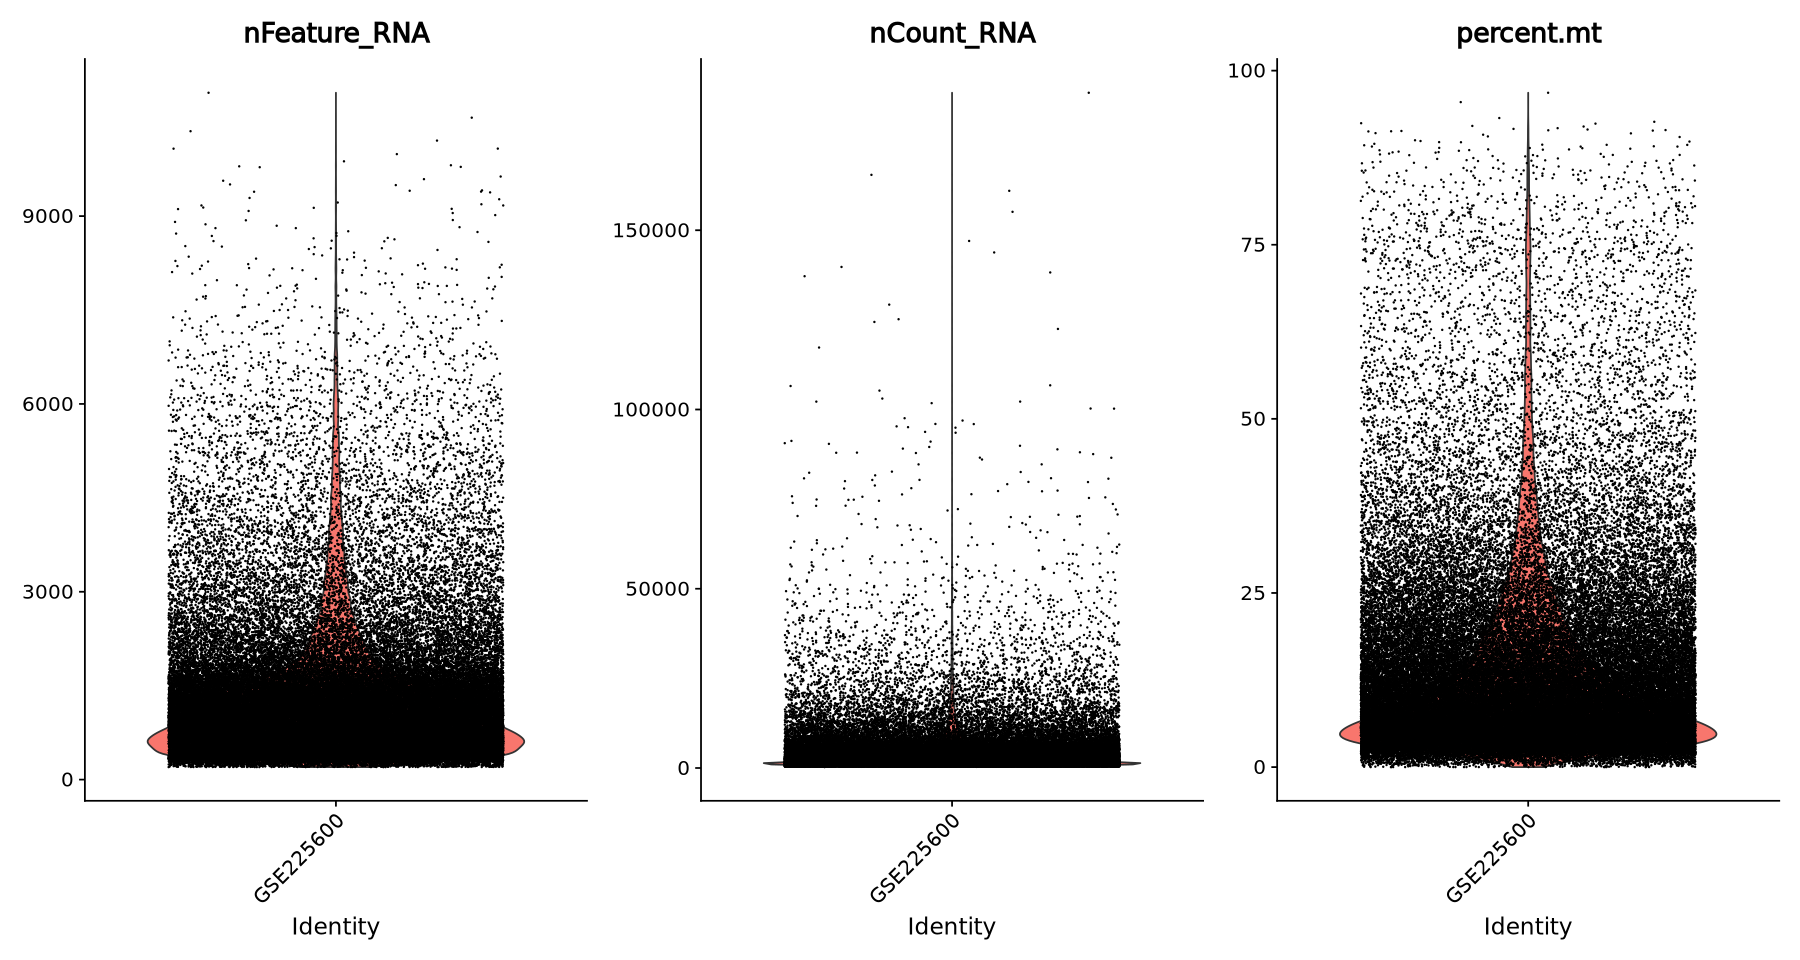

In [26]:
#QC Steps 
BC[["percent.mt"]] <- PercentageFeatureSet(BC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(BC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [27]:
#Normalise the data
BC <- NormalizeData(BC)

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8



In [28]:
#Find variable features
BC <- FindVariableFeatures(BC, selection.method = "vst", nfeatures = 2000)

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8



In [29]:
#Scale the data
BC <- ScaleData(BC, vars.to.regress = c("percent.mt", "nCount_RNA"))

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix



In [30]:
#Run PCA
BC <- RunPCA(BC, features = VariableFeatures(object = BC))

PC_ 1 
Positive:  IGFBP7, SPARCL1, IFITM3, IFI27, SPARC, A2M, COL4A2, COL4A1, CALD1, GNG11 
	   CAV1, IGFBP4, GSN, HSPG2, CAVIN1, CST3, CAVIN3, EPAS1, CRIP2, TCF4 
	   RAMP2, TIMP3, PLVAP, COL18A1, ENG, EGFL7, PTMS, AQP1, ADAMTS1, TIMP1 
Negative:  CD69, LTB, IL7R, GPR183, TNFAIP3, DUSP2, ZNF331, TRBC2, BIRC3, LCP1 
	   CCR7, TRBC1, AREG, LAPTM5, RGS1, MS4A1, SAMSN1, PLAC8, SLA, LY9 
	   HIST1H1D, IGHM, ICOS, TSTD1, CD79A, RAB11FIP1, ITGB2, HLA-DQA1, BCL2A1, TTN 
PC_ 2 
Positive:  PECAM1, PLVAP, ADGRL4, EGFL7, AQP1, RAMP2, VWF, CD93, PCAT19, FLT1 
	   EMCN, RNASE1, CDH5, NPDC1, CLDN5, ECSCR, ENG, CLEC14A, CD34, CALCRL 
	   CCL14, PTPRB, PALMD, HSPG2, HYAL2, RAMP3, DIPK2B, SOX18, CYYR1, GNG11 
Negative:  PRRX1, TPM2, COL1A2, PDGFRB, CPE, ACTA2, TAGLN, COL14A1, COL3A1, COL1A1 
	   NOTCH3, MYL9, SOD3, COL6A1, PCOLCE, SERPINF1, COL6A2, SDC2, EDNRA, KCNE4 
	   SLIT3, PLAC9, NDUFA4L2, COL6A3, AEBP1, TPM1, SYNPO2, C1R, CCDC102B, LMOD1 
PC_ 3 
Positive:  LTB, CD69, IL7R, TNFAIP3, VIM, GPR183, 

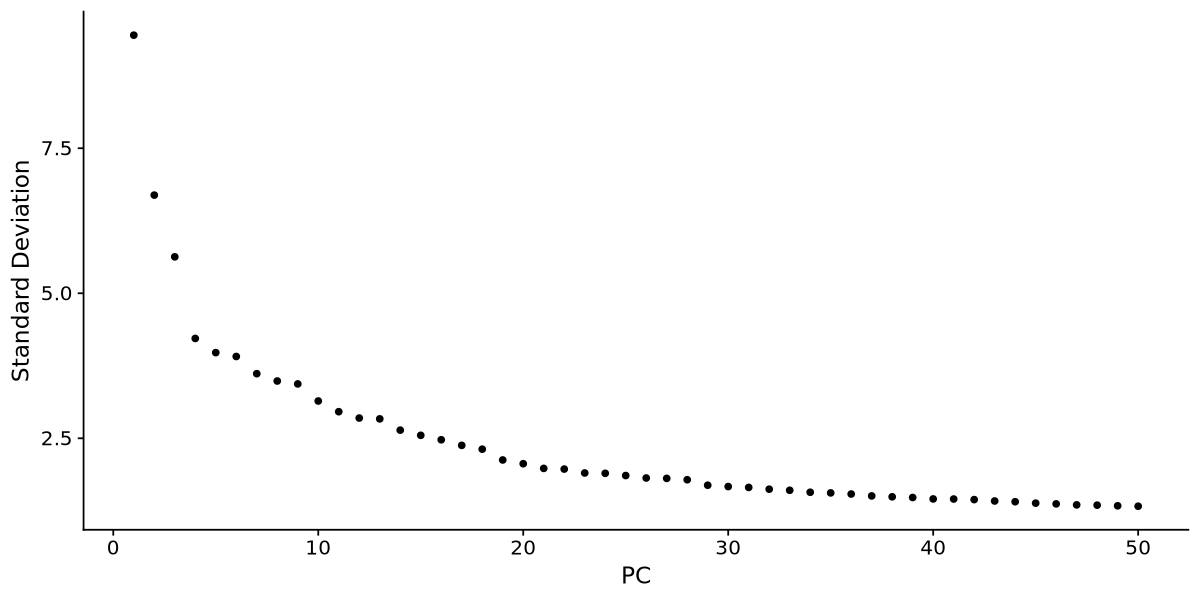

In [31]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(BC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [32]:
#Find neighbours (make sure number matches no. features chosen above)
BC <- FindNeighbors(BC, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [33]:
#Run UMAP
BC <- RunUMAP(BC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


12:14:12 UMAP embedding parameters a = 0.9922 b = 1.112

12:14:12 Read 80031 rows and found 40 numeric columns

12:14:12 Using Annoy for neighbor search, n_neighbors = 30

12:14:12 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:14:18 Writing NN index file to temp file /scratch/temp/9664142/RtmpsGDNbl/filedacf11b3ca970

12:14:18 Searching Annoy index using 1 thread, search_k = 3000

12:14:42 Annoy recall = 100%

12:14:42 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

12:14:44 Initializing from normalized Laplacian + noise (using RSpectra)

12:14:46 Commencing optimization for 200 epochs, with 3752900 positive edges

12:15:15 Optimization finished



In [34]:
#Cluster, resolution here set to 0.2
BC <- FindClusters(BC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 80031
Number of edges: 2956657

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9550
Number of communities: 17
Elapsed time: 21 seconds


1 singletons identified. 16 final clusters.



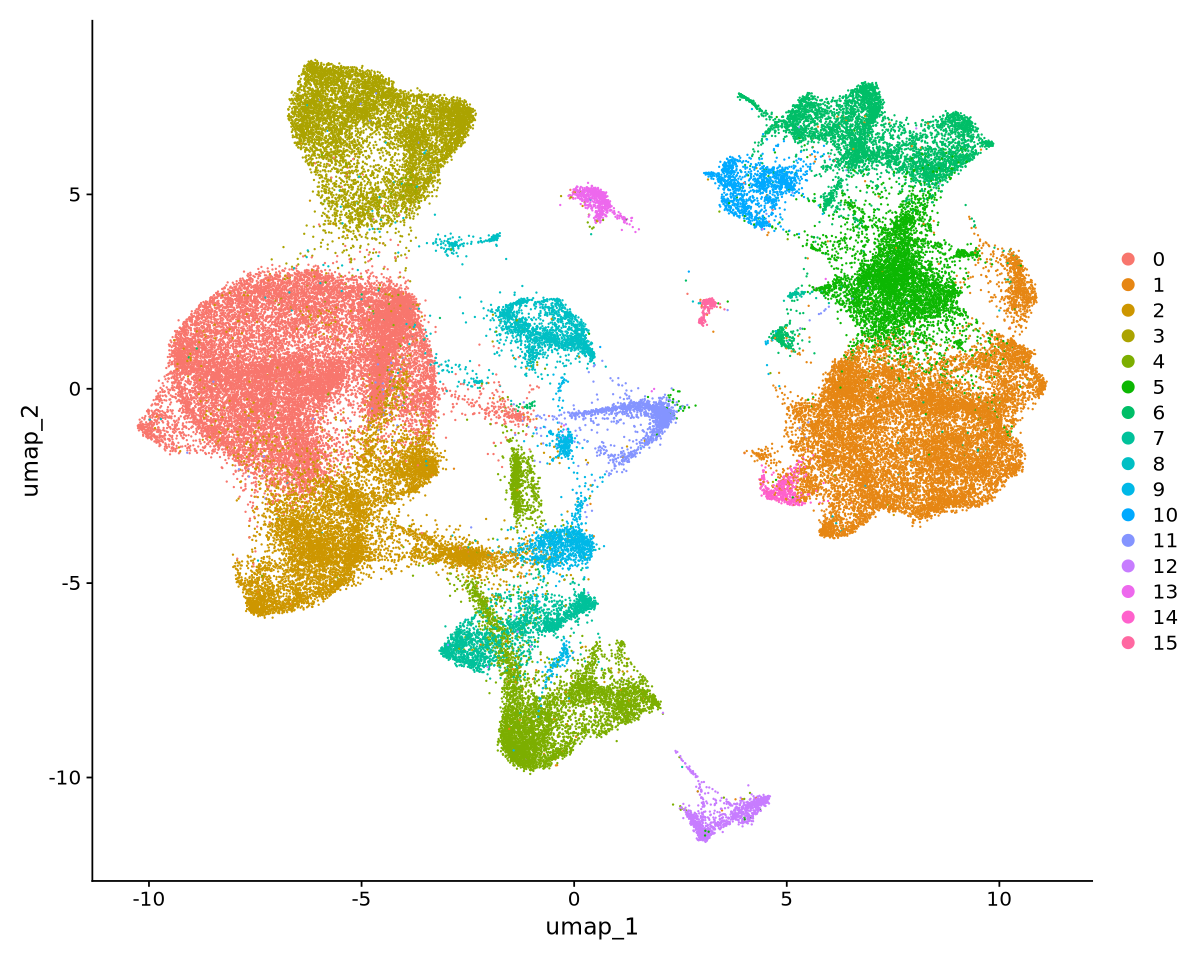

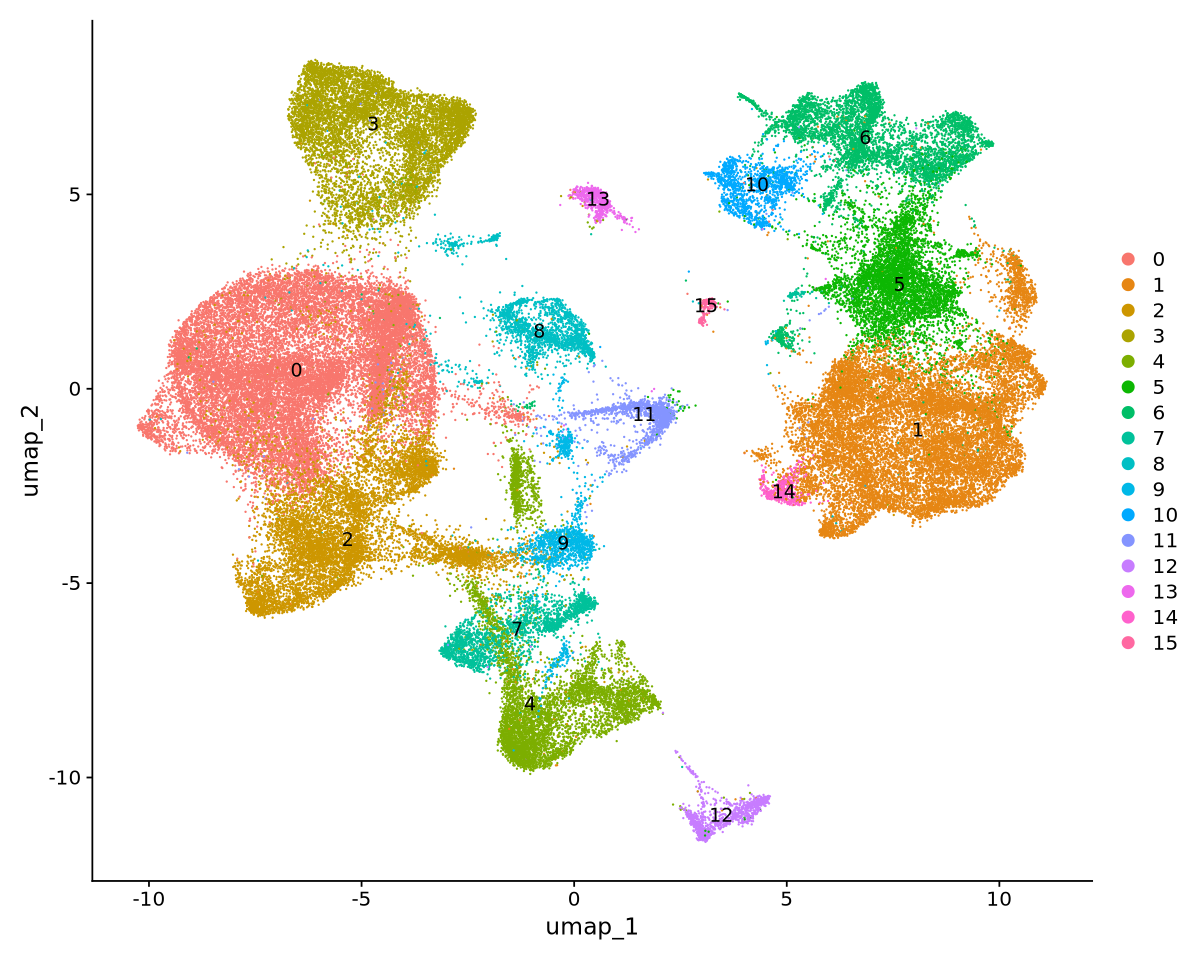

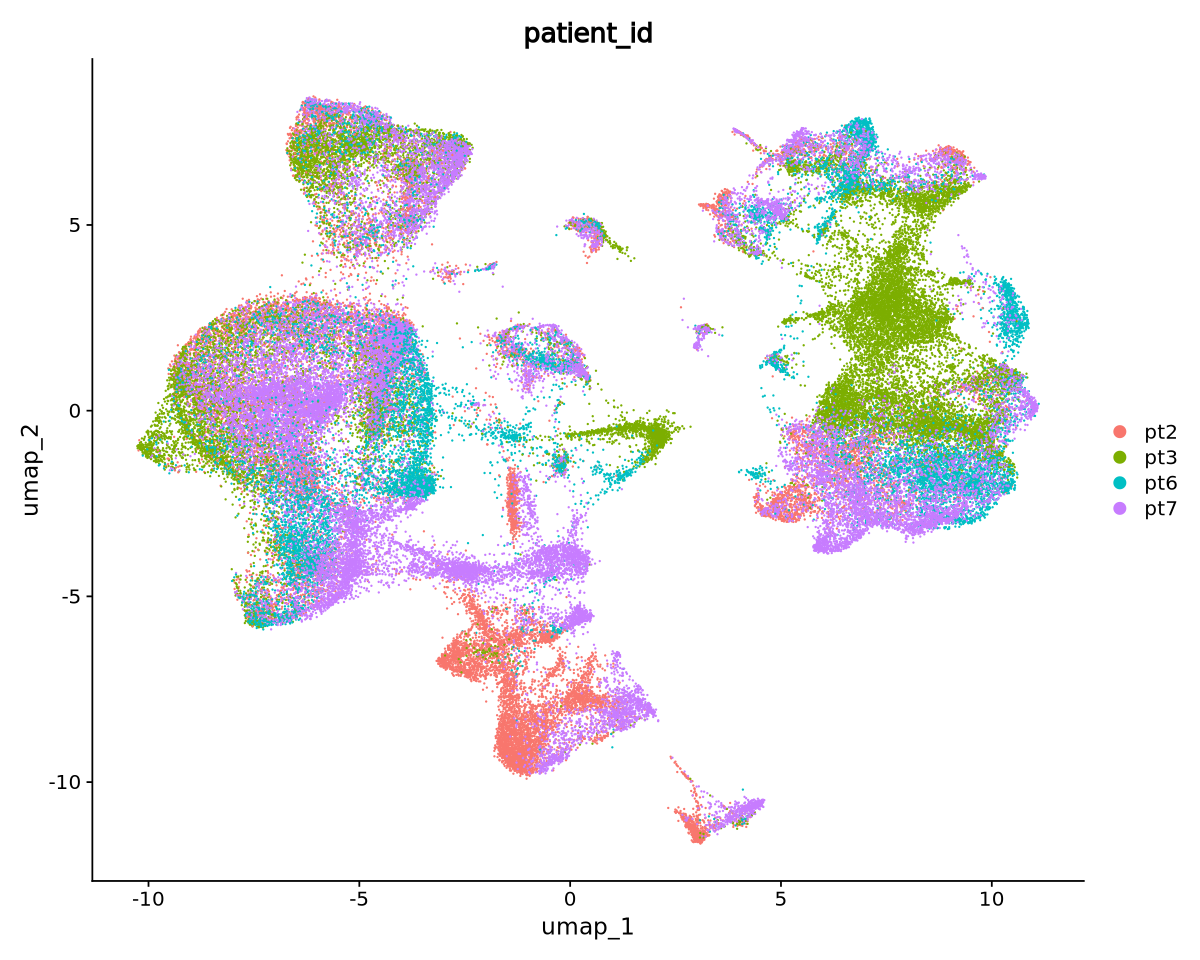

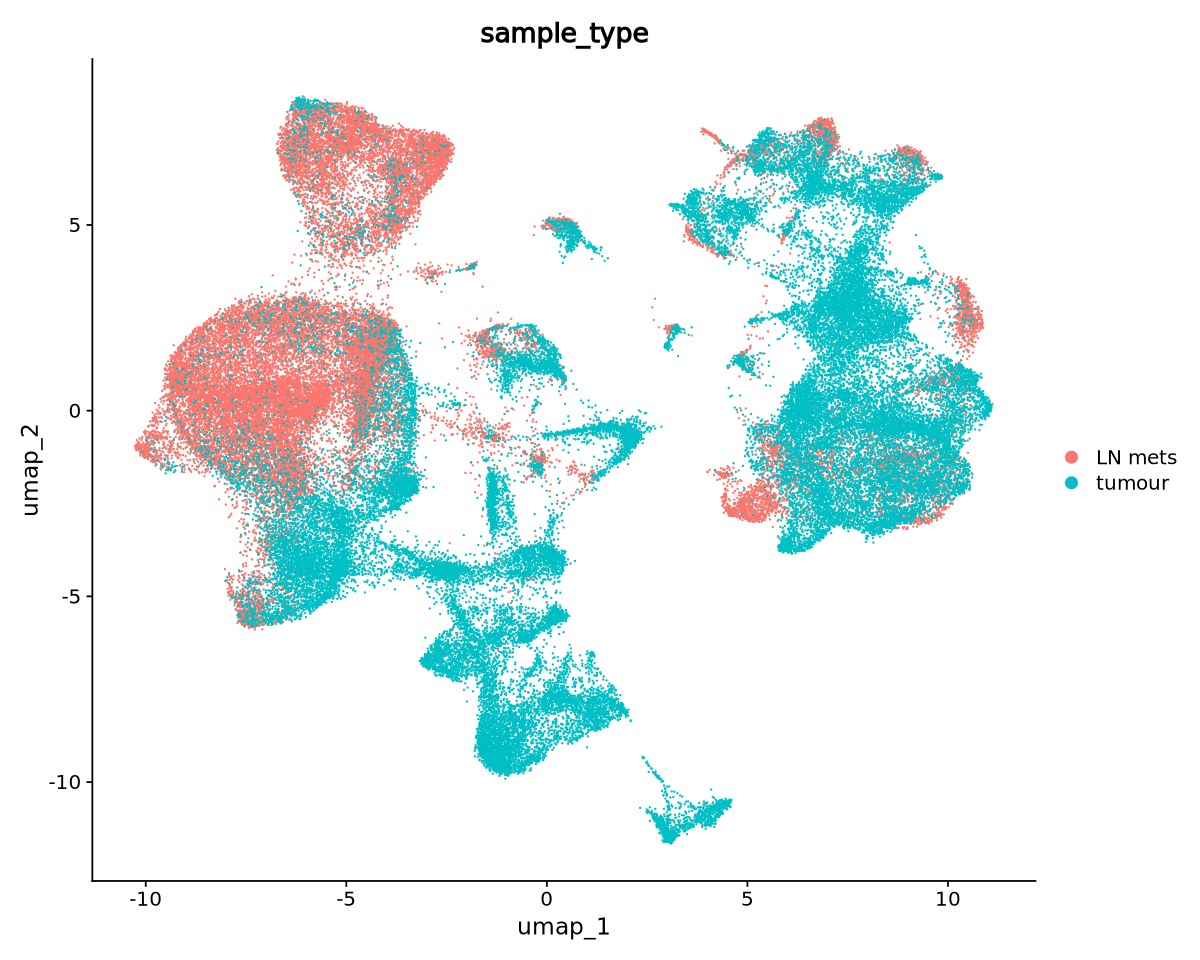

In [35]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(BC, reduction = "umap")
DimPlot(BC, reduction = "umap", label=TRUE)
DimPlot(BC, reduction = "umap", group = "patient_id")
DimPlot(BC, reduction = "umap", group = "sample_type")

In [36]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(BC, file = "/scratch/user/s4436039/scdata/GSE225600/GSE225600.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

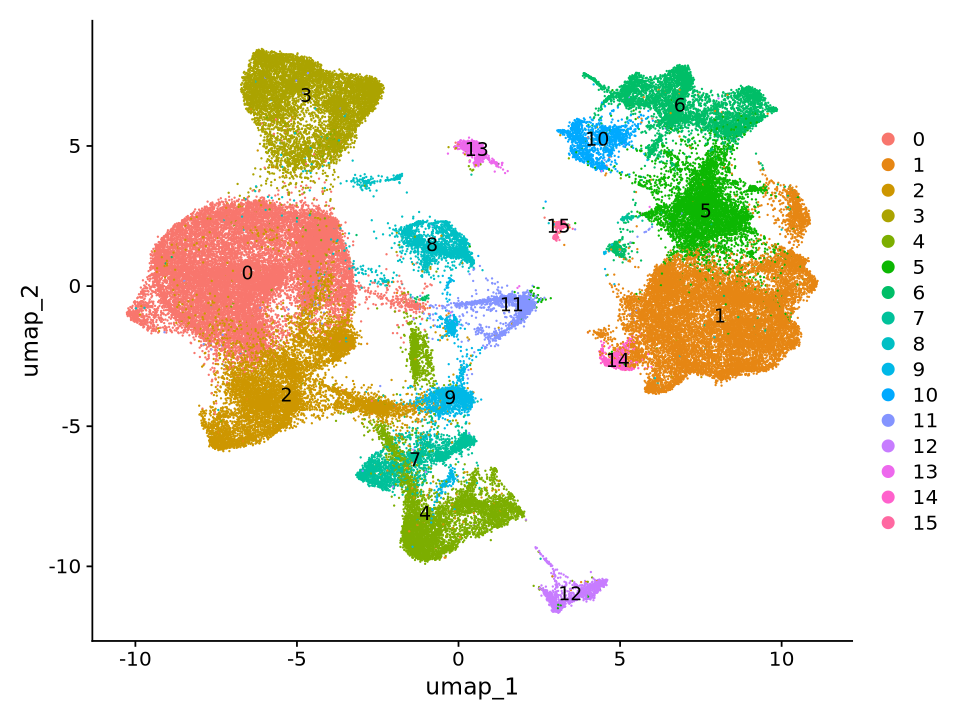

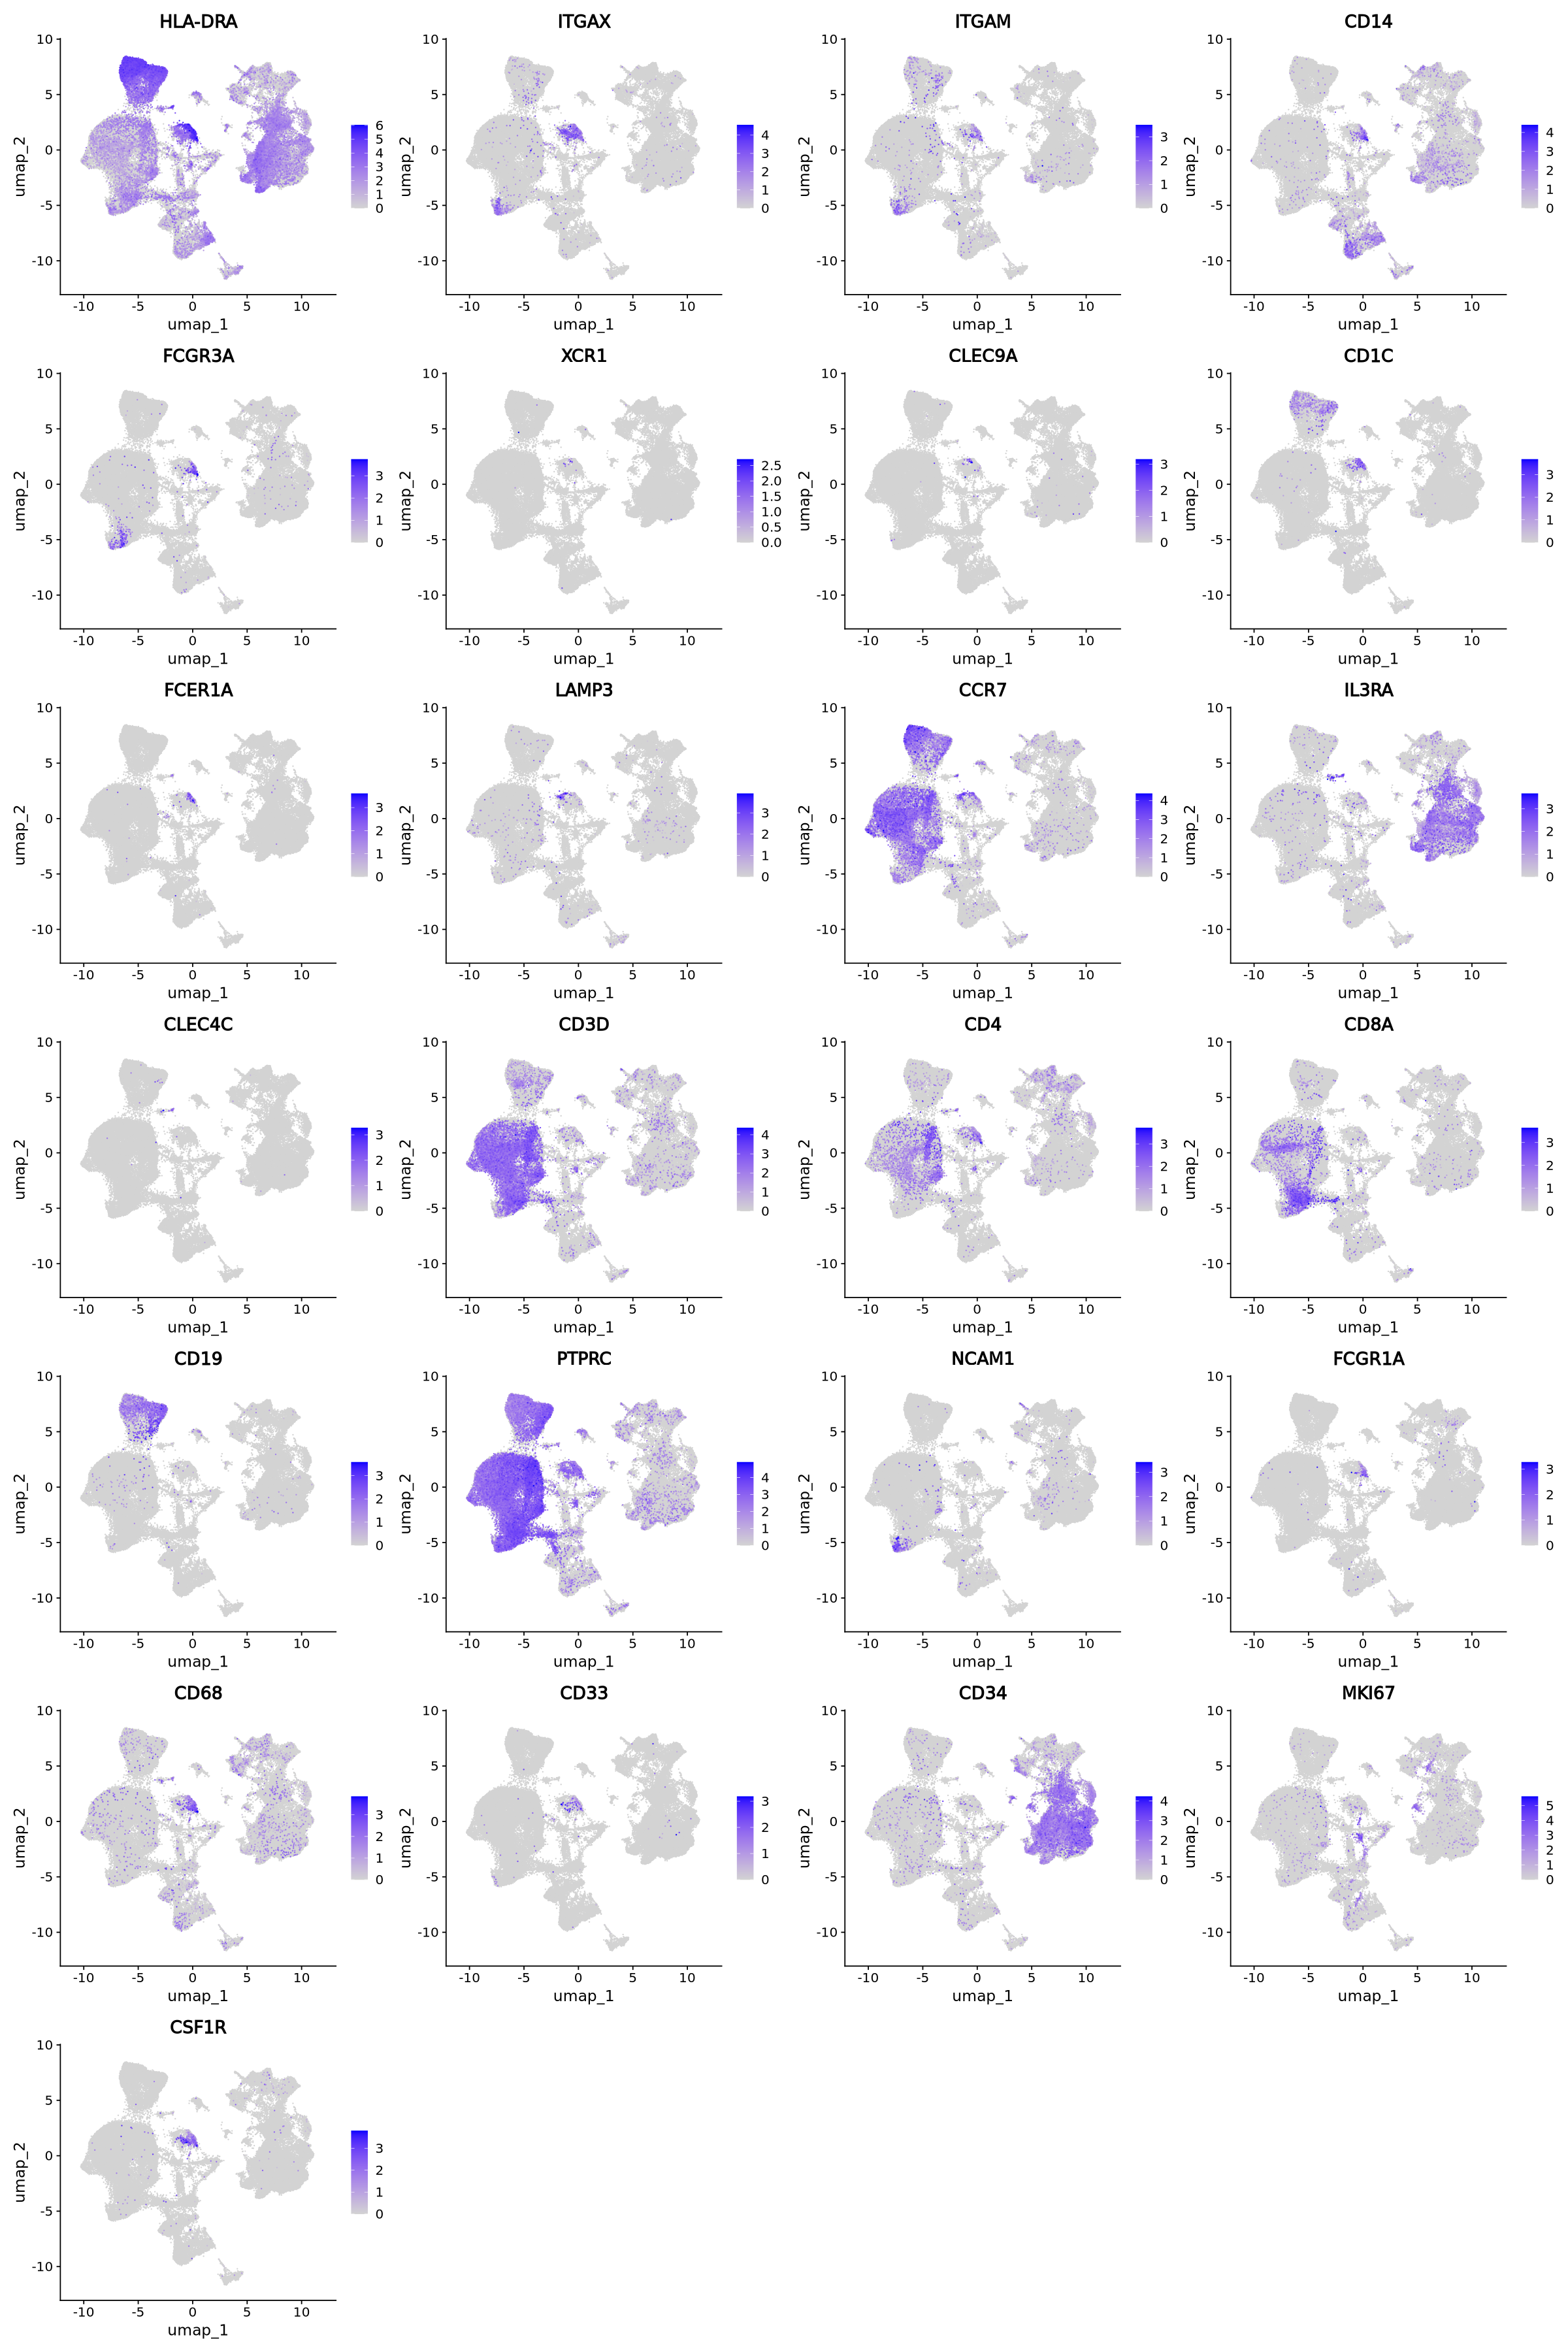

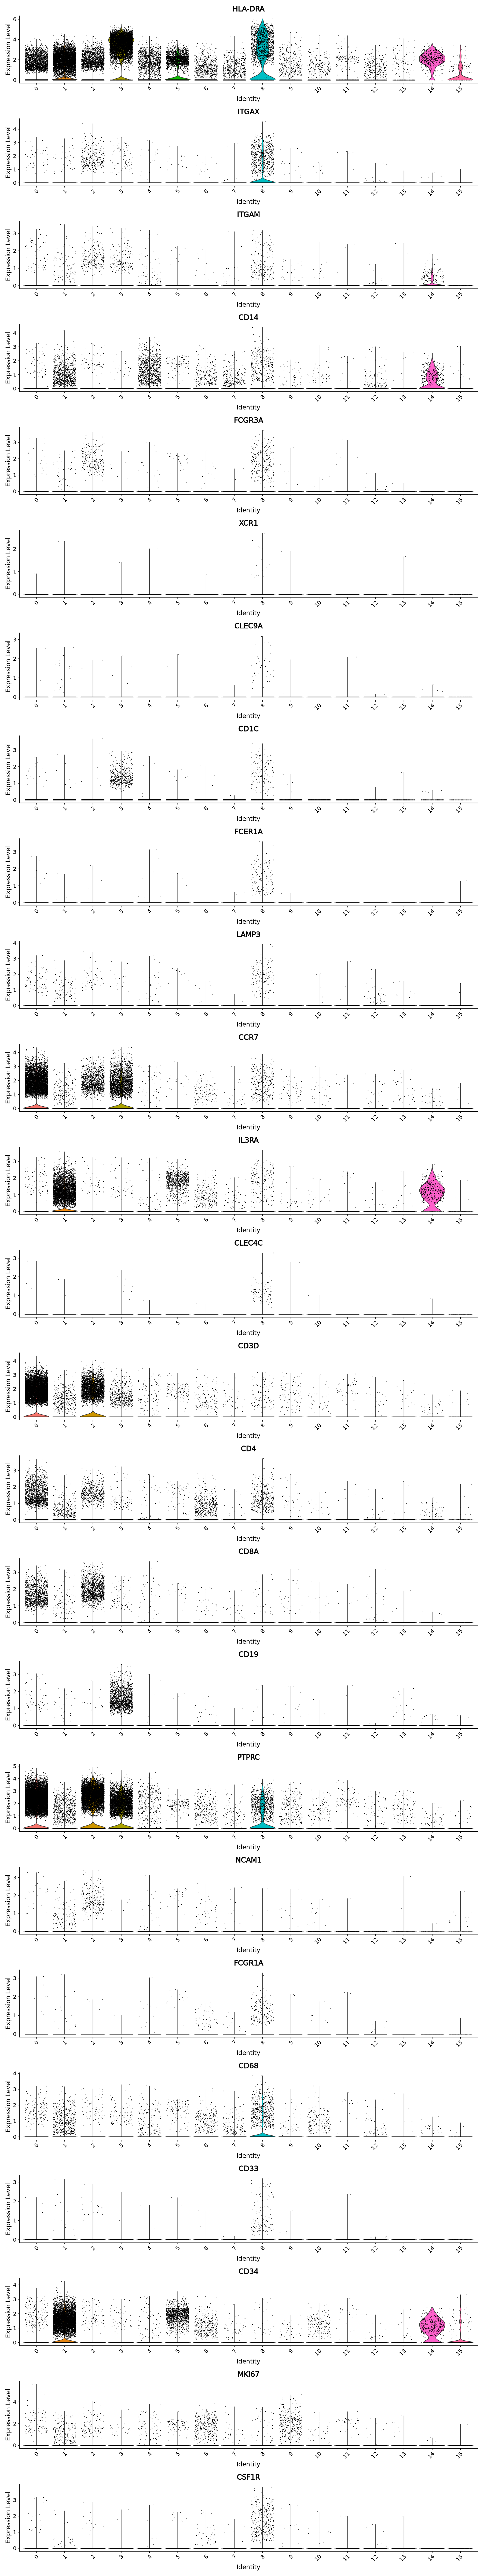

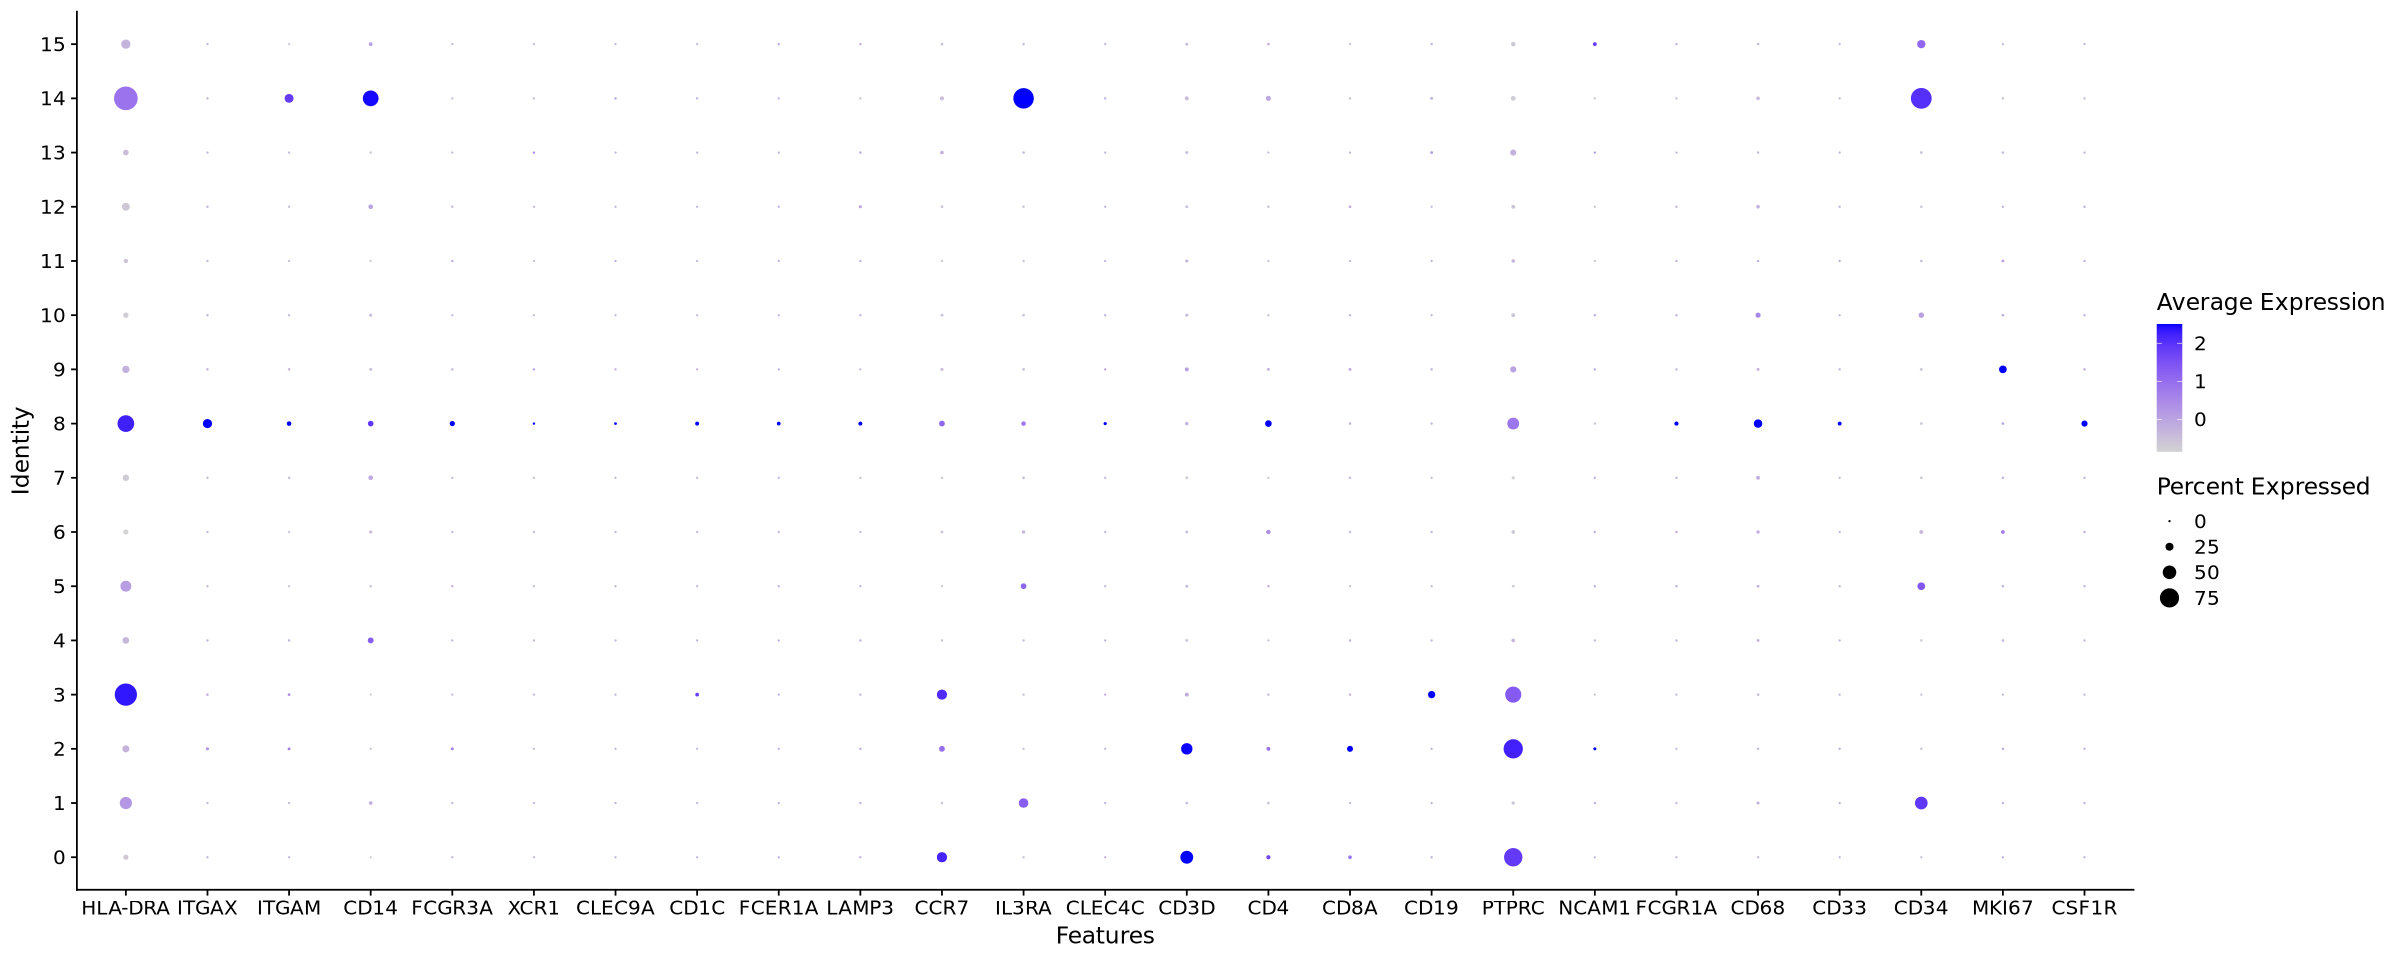

In [37]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(BC, reduction = "umap", label=TRUE)

options(repr.plot.height=30, repr.plot.width=20)
FeaturePlot(BC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(BC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(BC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

#### From above it looks like cluster 8 is the myeloid cells, now subsetting out this clusters

In [38]:
head(BC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE225600_LN_mets_pt2_AAACCCAAGACGGTTG-L2 GSE225600  4634       1632        
GSE225600_LN_mets_pt2_AAACCCAAGTCACTAC-L2 GSE225600   437        271        
GSE225600_LN_mets_pt2_AAACCCAGTATTGAGA-L2 GSE225600  2245        826        
GSE225600_LN_mets_pt2_AAACCCATCAGCTAGT-L2 GSE225600  1510        753        
GSE225600_LN_mets_pt2_AAACCCATCTACCAGA-L2 GSE225600  5917       1531        
GSE225600_LN_mets_pt2_AAACCCATCTGCTTAT-L2 GSE225600  4660       1391        
                                          cancer_type   sample_meta sample_type
GSE225600_LN_mets_pt2_AAACCCAAGACGGTTG-L2 breast cancer L2          LN mets    
GSE225600_LN_mets_pt2_AAACCCAAGTCACTAC-L2 breast cancer L2          LN mets    
GSE225600_LN_mets_pt2_AAACCCAGTATTGAGA-L2 breast cancer L2          LN mets    
GSE225600_LN_mets_pt2_AAACCCATCAGCTAGT-L2 breast cancer L2          LN mets    
GSE225600_LN_mets_pt2_AAACCCATCTACCAGA-L2 breast cancer L2          LN mets    
GSE225600_LN_mets_pt2_AAACCCATCTGCTTAT-L2 breast cancer L2          LN mets    
                                          patient_id sample_id               
GSE225600_LN_mets_pt2_AAACCCAAGACGGTTG-L2 pt2        GSE225600_BC_LN_mets_pt2
GSE225600_LN_mets_pt2_AAACCCAAGTCACTAC-L2 pt2        GSE225600_BC_LN_mets_pt2
GSE225600_LN_mets_pt2_AAACCCAGTATTGAGA-L2 pt2        GSE225600_BC_LN_mets_pt2
GSE225600_LN_mets_pt2_AAACCCATCAGCTAGT-L2 pt2        GSE225600_BC_LN_mets_pt2
GSE225600_LN_mets_pt2_AAACCCATCTACCAGA-L2 pt2        GSE225600_BC_LN_mets_pt2
GSE225600_LN_mets_pt2_AAACCCATCTGCTTAT-L2 pt2        GSE225600_BC_LN_mets_pt2
                                          percent.mt RNA_snn_res.0.2
GSE225600_LN_mets_pt2_AAACCCAAGACGGTTG-L2  5.243850  1              
GSE225600_LN_mets_pt2_AAACCCAAGTCACTAC-L2 18.077803  6              
GSE225600_LN_mets_pt2_AAACCCAGTATTGAGA-L2  8.730512  0              
GSE225600_LN_mets_pt2_AAACCCATCAGCTAGT-L2  8.013245  0              
GSE225600_LN_mets_pt2_AAACCCATCTACCAGA-L2  6.371472  3              
GSE225600_LN_mets_pt2_AAACCCATCTGCTTAT-L2  7.081545  3              
                                          seurat_clusters
GSE225600_LN_mets_pt2_AAACCCAAGACGGTTG-L2 1              
GSE225600_LN_mets_pt2_AAACCCAAGTCACTAC-L2 6              
GSE225600_LN_mets_pt2_AAACCCAGTATTGAGA-L2 0              
GSE225600_LN_mets_pt2_AAACCCATCAGCTAGT-L2 0              
GSE225600_LN_mets_pt2_AAACCCATCTACCAGA-L2 3              
GSE225600_LN_mets_pt2_AAACCCATCTGCTTAT-L2 3

In [39]:
myeloid_BC <- subset(BC, subset = RNA_snn_res.0.2 %in% c("8"))

In [40]:
BC
myeloid_BC

An object of class Seurat 
36601 features across 80031 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 17 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
36601 features across 2135 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 17 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, scale.data
 2 dimensional reductions calculated: pca, umap

In [41]:
saveRDS(myeloid_BC, "/scratch/user/s4436039/scdata/GSE225600/GSE225600_myeloid.RDS")

#### Following the above then need to move entire GSE225600 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE225600/ /QRISdata/Q5935/nikita/scdata/GSE225600
```